# **MIT 18.06 Linear Algebra, Spring 2005**

doc on which code sources are written: https://colab.research.google.com/drive/16CGMkzYboWQp9VJuG5XGllJCpkxdfpTy 

# *** To import modules and set ***

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from mpl_toolkits.mplot3d import Axes3D

x_unknown, y_unknown, z_unknown = sympy.symbols('x y z')
color_list = ['r', '#FFA500', 'y', 'g', 'b', '#4B0082', '#800080']



# **1. The Geometry of Linear Equations**
https://youtu.be/J7DzL2_Na80

 2 by 2 example
# Row Picture #
[ 2 -1] [x] [0]
[-1  2] [y] [3]


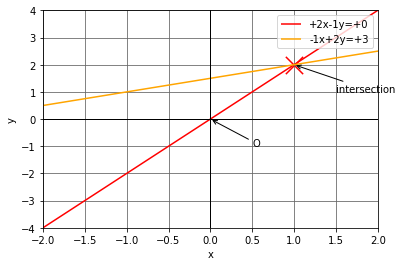

########################################################################
# Column picture #
It'll be added later


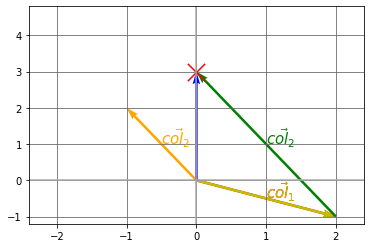

########################################################################
 3 by 3 example
# Row Picture #
[ 2 -1  1] [x] [0]
[-1  2 -1] [y] [-1]
[ 0 -3  4] [z] [4]


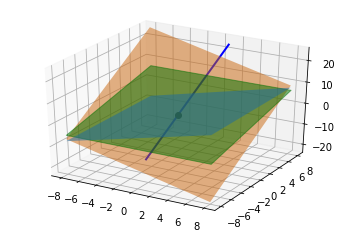

In [0]:
# n linear equations, n unknows
# Row picture
# * Column picture - important one
# Matrix form - we'll call A

# 2 by 2 example
print(" 2 by 2 example")
# 2x - y = 0
# -x + 2y = 3

matrix_A_coefficient = np.array([[+2, -1],
                                 [-1, 2]])
vector_X = np.array([[x_unknown],
                     [y_unknown]])
vector_b_right_hand = np.array([[0],
                                [3]])


# Row picture
print("# Row Picture #")
# print row picture equations
for i in range(0, len(matrix_A_coefficient)):
  print(matrix_A_coefficient[i], vector_X[i], vector_b_right_hand[i])

# plot row picture
delta_x = 0.01
delta_y = delta_x
x_start = -5
x_stop = -x_start
y_start = x_start
y_stop = x_stop
x = np.arange(x_start, x_stop, delta_x)
y = np.arange(y_start, y_stop, delta_y)
x_meshgrid, y_meshgrid = np.meshgrid(x, y)

for i in range(0, len(vector_X)):
  f_x_y = lambda x, y: matrix_A_coefficient[i][0] * x + matrix_A_coefficient[i][1] * y - vector_b_right_hand[i]
  temp = plt.contour(x_meshgrid, y_meshgrid, f_x_y(x_meshgrid, y_meshgrid), [0], colors = color_list[i % len(color_list)])

  coefficient_sign_determined = lambda i: ("+" if i >= 0 else "") + str(i)
  equation_string = ""
  for j in range(0, len(vector_X)):
    equation_string = equation_string + "%s%s" % (coefficient_sign_determined(matrix_A_coefficient[i][j]), vector_X[j][0])
  equation_string = equation_string + "=%s" % (coefficient_sign_determined(vector_b_right_hand[i][0]))
  temp.collections[0].set_label(equation_string)

plt.xlabel("x")
plt.ylabel("y")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.legend(loc = "best")
Origin_point = {x_unknown: 0, y_unknown: 0}
delta_x_and_delta_y_for_poisition_of_arrow = {x_unknown: +1/2, y_unknown: -1}
plt.annotate("O",
             xy = (Origin_point[x_unknown], Origin_point[y_unknown]),
             xytext = (Origin_point[x_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[x_unknown],
                       Origin_point[y_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[y_unknown]),
             arrowprops=dict(arrowstyle="->"))

equation = []
for i in range(0, len(vector_X)):
  equation.append(sympy.Eq(x_unknown * matrix_A_coefficient[i][0] + y_unknown * matrix_A_coefficient[i][1], vector_b_right_hand[i][0]))  
solution_of_equation = sympy.solve([equation[0], equation[1]], x_unknown, y_unknown)
plt.annotate("intersection",
             xy = (solution_of_equation[x_unknown], solution_of_equation[y_unknown]),
             xytext = (solution_of_equation[x_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[x_unknown],
                       solution_of_equation[y_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[y_unknown]),
             arrowprops=dict(arrowstyle="->"))

plt.scatter(float(solution_of_equation[x_unknown]),float(solution_of_equation[y_unknown]),marker='x',s = 300, color = 'r')
constant_for_limit = 2
plt.xlim(-abs(float(solution_of_equation[x_unknown]) * constant_for_limit), abs(float(solution_of_equation[x_unknown]) * constant_for_limit))
plt.ylim(-abs(float(solution_of_equation[y_unknown]) * constant_for_limit), abs(float(solution_of_equation[y_unknown]) * constant_for_limit))
plt.show()





################################################################################
print("########################################################################")





# Column picture
print("# Column picture #")
# print column picture equations
# linear combination of columns
# ?? how ??
print("It'll be added later")

# plot column picture
column_vector = []
for i in range(0, len(vector_X)):
  column_vector.append(matrix_A_coefficient[:][i].reshape([matrix_A_coefficient.shape[0], 1]))

solution_of_equation = sympy.solve([equation[0], equation[1]], x_unknown, y_unknown)
x_list = [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), 0]
y_list = [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), 0]
u_list = [float(column_vector[0][0]), float(column_vector[0][1]), float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), float(solution_of_equation[y_unknown]) * float(column_vector[0][1]), float(vector_b_right_hand[0])]
v_list = [float(column_vector[1][0]), float(column_vector[1][1]), float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), float(solution_of_equation[y_unknown]) * float(column_vector[1][1]), float(vector_b_right_hand[1])]
plt.quiver(x_list,
           y_list,
           u_list,
           v_list,
           angles='xy', scale_units='xy', scale=1,
           color=color_list)

plt.axvline(x = 0, color = '#A9A9A9')
plt.axhline(y = 0, color = '#A9A9A9')

constnat_for_vector_name_position = 0.5
plt.text(float(column_vector[0][0]) * constnat_for_vector_name_position,
         float(column_vector[1][0]) * constnat_for_vector_name_position,
         r'$\vec{col_1}$', color = color_list[0], size = 15)
plt.text(float(column_vector[0][1]) * constnat_for_vector_name_position,
         float(column_vector[1][1]) * constnat_for_vector_name_position,
         r'$\vec{col_2}$', color = color_list[1], size = 15)
plt.text(float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) * constnat_for_vector_name_position,
         float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) * constnat_for_vector_name_position,
         r'$\vec{col_1}$', color = color_list[2], size = 15)
plt.text((float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) + float(vector_b_right_hand[0])) * constnat_for_vector_name_position,
         (float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) + float(vector_b_right_hand[1])) * constnat_for_vector_name_position,
         r'$\vec{col_2}$', color = color_list[3], size = 15)
# plt.text(float(vector_b_right_hand[0]) * constnat_for_vector_name_position,
#          float(vector_b_right_hand[1]) * constnat_for_vector_name_position,
#          r'$\vec{right hand}$', color = color_list[4], size = 15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.scatter(float(vector_b_right_hand[0]),float(vector_b_right_hand[1]),marker='x',s = 300, color = 'r')
constant_for_limit = 1.2
plt.xlim(min(x_list + u_list) * constant_for_limit, max(x_list + u_list) * constant_for_limit)
plt.ylim(min(y_list + v_list) * constant_for_limit, max(y_list + v_list) * constant_for_limit)

plt.show()
plt.close()





################################################################################
print("########################################################################")





# 3 by 3 example
print(" 3 by 3 example")
# 2x -  y      = 0
# -x + 2y -  z = 3
#    - 3y + 4z = 4

matrix_A_coefficient = np.array([[+2, -1, 1],
                                 [-1, 2, -1],
                                 [0, -3, 4]])
vector_X = np.array([[x_unknown],
                     [y_unknown],
                     [z_unknown]])
vector_b_right_hand = np.array([[0],
                                [-1],
                                [4]])


# Row picture
print("# Row Picture #")
# print row picture equations
for i in range(0, len(matrix_A_coefficient)):
  print(matrix_A_coefficient[i], vector_X[i], vector_b_right_hand[i])

# plot row picture
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.linspace(-8,8,100), np.linspace(-8,8,100)
X, Y = np.meshgrid(x,y)
Z = []
for i in range(0, len(vector_X)):
  Z.append((matrix_A_coefficient[i][0] * X
          + matrix_A_coefficient[i][1] * Y
          - vector_b_right_hand[i]) / (- matrix_A_coefficient[i][2]))

asdf = np.linspace(-8, 8, 100)
ax.plot_surface(X,Y,Z[0], alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z[1], alpha=0.5, rstride=100, cstride=100)


ax.plot((1,1),(-8,8),(-9,23), lw=2, c='b')
ax.plot_surface(X,Y,Z[2], alpha=0.5, facecolors='g', rstride=100, cstride=100)
ax.plot((1,),(-2,),(3,), lw=2, c='k', marker='o')

# ax.plot_surface(x_meshgrid,y_meshgrid,z_1_meshgrid, alpha=0.5, rstride=100, cstride=100)
# ax.plot_surface(x_meshgrid,y_meshgrid,z_2_meshgrid, alpha=0.5, rstride=100, cstride=100)


# ax.plot((1,1),(-8,8),(-9,23), lw=2, c='b')
# ax.plot_surface(x_meshgrid,y_meshgrid,z_3_meshgrid, alpha=0.5, facecolors='g', rstride=100, cstride=100)
# ax.plot((1,),(-2,),(3,), lw=2, c='k', marker='o')

plt.show()

# for i in range(0, len(vector_X)):
#   f_x_y = lambda x, y: matrix_A_coefficient[i][0] * x + matrix_A_coefficient[i][1] * y - vector_b_right_hand[i]
#   temp = plt.contour(x_meshgrid, y_meshgrid, f_x_y(x_meshgrid, y_meshgrid), [0], colors = color_list[i % len(color_list)])

#   coefficient_sign_determined = lambda i: ("+" if i >= 0 else "") + str(i)
#   equation_string = ""
#   for j in range(0, len(vector_X)):
#     equation_string = equation_string + "%s%s" % (coefficient_sign_determined(matrix_A_coefficient[i][j]), vector_X[j][0])
#   equation_string = equation_string + "=%s" % (coefficient_sign_determined(vector_b_right_hand[i][0]))
#   temp.collections[0].set_label(equation_string)

# plt.xlabel("x")
# plt.ylabel("y")
# plt.grid(b=True, which='major', color='#666666', linestyle='-')
# plt.axhline(y=0, color='k', linewidth=1)
# plt.axvline(x=0, color='k', linewidth=1)
# plt.legend(loc = "best")
# Origin_point = {x_unknown: 0, y_unknown: 0}
# delta_x_and_delta_y_for_poisition_of_arrow = {x_unknown: +1/2, y_unknown: -1}
# plt.annotate("O",
#              xy = (Origin_point[x_unknown], Origin_point[y_unknown]),
#              xytext = (Origin_point[x_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[x_unknown],
#                        Origin_point[y_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[y_unknown]),
#              arrowprops=dict(arrowstyle="->"))

# equation = []
# for i in range(0, len(vector_X)):
#   equation.append(sympy.Eq(x_unknown * matrix_A_coefficient[i][0] + y_unknown * matrix_A_coefficient[i][1], vector_b_right_hand[i][0]))  
# solution_of_equation = sympy.solve([equation[0], equation[1]], x_unknown, y_unknown)
# plt.annotate("intersection",
#              xy = (solution_of_equation[x_unknown], solution_of_equation[y_unknown]),
#              xytext = (solution_of_equation[x_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[x_unknown],
#                        solution_of_equation[y_unknown] + delta_x_and_delta_y_for_poisition_of_arrow[y_unknown]),
#              arrowprops=dict(arrowstyle="->"))

# plt.scatter(float(solution_of_equation[x_unknown]),float(solution_of_equation[y_unknown]),marker='x',s = 300, color = 'r')
# constant_for_limit = 2
# plt.xlim(-abs(float(solution_of_equation[x_unknown]) * constant_for_limit), abs(float(solution_of_equation[x_unknown]) * constant_for_limit))
# plt.ylim(-abs(float(solution_of_equation[y_unknown]) * constant_for_limit), abs(float(solution_of_equation[y_unknown]) * constant_for_limit))
# plt.show()





# ################################################################################
# print("########################################################################")

# # Column picture
# print("# Column picture #")
# # print column picture equations
# # linear combination of columns
# # ?? how ??
# print("It'll be added later")

# # plot column picture
# column_vector = []
# for i in range(0, len(vector_X)):
#   column_vector.append(matrix_A_coefficient[:][i].reshape([matrix_A_coefficient.shape[0], 1]))

# solution_of_equation = sympy.solve([equation[0], equation[1]], x_unknown, y_unknown)
# x_list = [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), 0]
# y_list = [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), 0]
# u_list = [float(column_vector[0][0]), float(column_vector[0][1]), float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), float(solution_of_equation[y_unknown]) * float(column_vector[0][1]), float(vector_b_right_hand[0])]
# v_list = [float(column_vector[1][0]), float(column_vector[1][1]), float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), float(solution_of_equation[y_unknown]) * float(column_vector[1][1]), float(vector_b_right_hand[1])]
# plt.quiver(x_list,
#            y_list,
#            u_list,
#            v_list,
#            angles='xy', scale_units='xy', scale=1,
#            color=color_list)

# plt.axvline(x = 0, color = '#A9A9A9')
# plt.axhline(y = 0, color = '#A9A9A9')

# constnat_for_vector_name_position = 0.5
# plt.text(float(column_vector[0][0]) * constnat_for_vector_name_position,
#          float(column_vector[1][0]) * constnat_for_vector_name_position,
#          r'$\vec{col_1}$', color = color_list[0], size = 15)
# plt.text(float(column_vector[0][1]) * constnat_for_vector_name_position,
#          float(column_vector[1][1]) * constnat_for_vector_name_position,
#          r'$\vec{col_2}$', color = color_list[1], size = 15)
# plt.text(float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) * constnat_for_vector_name_position,
#          float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) * constnat_for_vector_name_position,
#          r'$\vec{col_1}$', color = color_list[2], size = 15)
# plt.text((float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) + float(vector_b_right_hand[0])) * constnat_for_vector_name_position,
#          (float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) + float(vector_b_right_hand[1])) * constnat_for_vector_name_position,
#          r'$\vec{col_2}$', color = color_list[3], size = 15)
# # plt.text(float(vector_b_right_hand[0]) * constnat_for_vector_name_position,
# #          float(vector_b_right_hand[1]) * constnat_for_vector_name_position,
# #          r'$\vec{right hand}$', color = color_list[4], size = 15)
# plt.grid(b=True, which='major', color='#666666', linestyle='-')

# plt.scatter(float(vector_b_right_hand[0]),float(vector_b_right_hand[1]),marker='x',s = 300, color = 'r')
# constant_for_limit = 1.2
# plt.xlim(min(x_list + u_list) * constant_for_limit, max(x_list + u_list) * constant_for_limit)
# plt.ylim(min(y_list + v_list) * constant_for_limit, max(y_list + v_list) * constant_for_limit)

# plt.show()
# plt.close()

# Test

In [0]:
z_1_meshgrid = (matrix_A_coefficient[0][0] * x_meshgrid
                + matrix_A_coefficient[0][1] * y_meshgrid
                - vector_b_right_hand[0]) / (-matrix_A_coefficient[0][2])
print(z_1_meshgrid)

[[ -5.    -4.98  -4.96 ...  14.94  14.96  14.98]
 [ -5.01  -4.99  -4.97 ...  14.93  14.95  14.97]
 [ -5.02  -5.    -4.98 ...  14.92  14.94  14.96]
 ...
 [-14.97 -14.95 -14.93 ...   4.97   4.99   5.01]
 [-14.98 -14.96 -14.94 ...   4.96   4.98   5.  ]
 [-14.99 -14.97 -14.95 ...   4.95   4.97   4.99]]


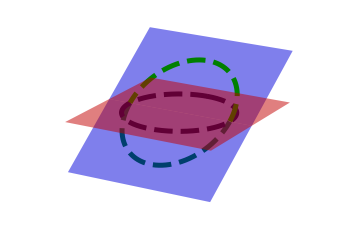

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dim = 10

X, Y = np.meshgrid([-dim, dim], [-dim, dim])
Z = np.zeros((2, 2))

angle = .5
X2, Y2 = np.meshgrid([-dim, dim], [0, dim])
Z2 = Y2 * angle
X3, Y3 = np.meshgrid([-dim, dim], [-dim, 0])
Z3 = Y3 * angle

r = 7
M = 1000
th = np.linspace(0, 2 * np.pi, M)

x, y, z = r * np.cos(th),  r * np.sin(th), angle * r * np.sin(th)

ax.plot_surface(X2, Y3, Z3, color='blue', alpha=.5, linewidth=0, zorder=-1)

ax.plot(x[y < 0], y[y < 0], z[y < 0], lw=5, linestyle='--', color='green',
        zorder=0)

ax.plot_surface(X, Y, Z, color='red', alpha=.5, linewidth=0, zorder=1)

ax.plot(r * np.sin(th), r * np.cos(th), np.zeros(M), lw=5, linestyle='--',
        color='k', zorder=2)

ax.plot_surface(X2, Y2, Z2, color='blue', alpha=.5, linewidth=0, zorder=3)

ax.plot(x[y > 0], y[y > 0], z[y > 0], lw=5, linestyle='--', color='green',
        zorder=4)

plt.axis('off')
plt.show()


In [0]:
# help(plt.annotate)
z = {'x: 1', 'y: 2'}
# z[]

awq = {x_unknown: +1, y_unknown: 3}
print(type(awq))
print(awq)
solution_of_equation[x_unknown]

<class 'dict'>
{x: 1, y: 3}


3/5

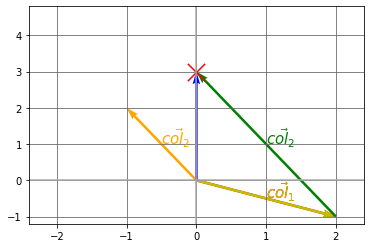

{x: 1, y: 2}


In [0]:
# u = [0,0,0.5,1]
# u_bis = [u[2],u[3],u[2],u[3]]
# v = [2*u[2],2*u[3],-1,1]
# v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]

# # plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
# #            [u[1], u_bis[1], v[1], v_bis[1]],
# #            [u[2], u_bis[2], v[2], v_bis[2]],
# #            [u[3], u_bis[3], v[3], v_bis[3]],
# #            angles='xy', scale_units='xy', scale=1, color=['blue', 'blue', 'orange', 'orange'])
# plt.quiver([0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), 0],
#            [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[0][1]), 0],
#            [float(column_vector[0][0]), float(column_vector[0][1]), float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), float(solution_of_equation[y_unknown]) * float(column_vector[0][1]), float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) + float(solution_of_equation[y_unknown]) * float(column_vector[1][0])],
#            [float(column_vector[1][0]), float(column_vector[1][1]), float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), float(solution_of_equation[y_unknown]) * float(column_vector[1][1]), float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) + float(solution_of_equation[y_unknown]) * float(column_vector[1][1])],
#            angles='xy', scale_units='xy', scale=1,
#            color=color_list)

# # plt.rc('text', usetex=True)
# # plt.xlim(-1.5, 2)
# # plt.ylim(-0.5, 4.5)
# # draw axes
# plt.axvline(x=0, color='#A9A9A9')
# plt.axhline(y=0, color='#A9A9A9')
# plt.scatter(-1,4,marker='x',s=50)
# plt.text(0, 0.5, r'$\vec{u}$', color='blue', size=18)
# plt.text(0.5, 1.5, r'$\vec{u}$', color='blue', size=18)
# plt.text(0.5, 2.7, r'$\vec{v}$', color='orange', size=18)
# plt.text(-0.8, 3, r'$\vec{v}$', color='orange', size=18)
# plt.show()
# plt.close()


# matrix_A_coefficient = np.array([[2, -1],
#                                  [-1, 2]])
# vector_X = np.array([[x_unknown],
#                      [y_unknown]])
# vector_b_right_hand = np.array([[0],
#                                 [3]])

# vector_column = np.array([[0],
#                           [3]]) * 2
# vector_column = np.empty([len(vector_X), len(vector_X)], dtype = float)
# vector_list = []
# vector_column_1 = matrix_A_coefficient[:][0].reshape([2, 1])
# vector_list.append(vector_column_1)
# vector_column_2 = matrix_A_coefficient[:][1].reshape([2, 1])
# vector_list.append(vector_column_2)

# solution_of_equation = sympy.solve([equation[0], equation[1]], x_unknown, y_unknown)
# x = [0, 0, 0, solution_of_equation[x_unknown] * , vector_b_right_hand[0]]
# print(x)
# print(vector_column_1)
# print(vector_column_1.shape)
# print(vector_column_2)
# print(vector_column_2.shape)
# print(vector_list)
# print(type(vector_list[0]))
# print(vector_list[0])


# print(vector_column[0])
# print(vector_column[1][0])
# matrix_A_coefficient = np.array([[2, -1],
#                                  [-1, 2],
#                                  [3, 4]])
# print(len(matrix_A_coefficient[:][0]))
# print(matrix_A_coefficient.shape[0])
# print(matrix_A_coefficient)
# print(type(matrix_A_coefficient.shape[0]))

# print(column_vector[0][0])
# print(column_vector[0][1])
# print(type(column_vector[0][0]))
# print(type(int(solution_of_equation[x_unknown])))

# ######################################33

column_vector = []
for i in range(0, len(vector_X)):
  column_vector.append(matrix_A_coefficient[:][i].reshape([matrix_A_coefficient.shape[0], 1]))

solution_of_equation = sympy.solve([equation[0], equation[1]], x_unknown, y_unknown)
x_list = [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), 0]
y_list = [0, 0, 0, float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), 0]
u_list = [float(column_vector[0][0]), float(column_vector[0][1]), float(solution_of_equation[x_unknown]) * float(column_vector[0][0]), float(solution_of_equation[y_unknown]) * float(column_vector[0][1]), float(vector_b_right_hand[0])]
v_list = [float(column_vector[1][0]), float(column_vector[1][1]), float(solution_of_equation[x_unknown]) * float(column_vector[1][0]), float(solution_of_equation[y_unknown]) * float(column_vector[1][1]), float(vector_b_right_hand[1])]
plt.quiver(x_list,
           y_list,
           u_list,
           v_list,
           angles='xy', scale_units='xy', scale=1,
           color=color_list)

constant_for_limit = 1.2
plt.xlim(min(x_list + u_list) * constant_for_limit, max(x_list + u_list) * constant_for_limit)
plt.ylim(min(y_list + v_list) * constant_for_limit, max(y_list + v_list) * constant_for_limit)

plt.axvline(x = 0, color = '#A9A9A9')
plt.axhline(y = 0, color = '#A9A9A9')
plt.scatter(float(vector_b_right_hand[0]),float(vector_b_right_hand[1]),marker='x',s = 300, color = 'r')
constnat_for_vector_name_position = 0.5
plt.text(float(column_vector[0][0]) * constnat_for_vector_name_position,
         float(column_vector[1][0]) * constnat_for_vector_name_position,
         r'$\vec{col_1}$', color = color_list[0], size = 15)
plt.text(float(column_vector[0][1]) * constnat_for_vector_name_position,
         float(column_vector[1][1]) * constnat_for_vector_name_position,
         r'$\vec{col_2}$', color = color_list[1], size = 15)
plt.text(float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) * constnat_for_vector_name_position,
         float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) * constnat_for_vector_name_position,
         r'$\vec{col_1}$', color = color_list[2], size = 15)
plt.text((float(solution_of_equation[x_unknown]) * float(column_vector[0][0]) + float(vector_b_right_hand[0])) / 2,
         (float(solution_of_equation[x_unknown]) * float(column_vector[1][0]) + float(vector_b_right_hand[1])) / 2,
         r'$\vec{col_2}$', color = color_list[3], size = 15)
# plt.text(float(vector_b_right_hand[0]) * constnat_for_vector_name_position,
#          float(vector_b_right_hand[1]) * constnat_for_vector_name_position,
#          r'$\vec{right hand}$', color = color_list[4], size = 15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()
plt.close()


[0]
<class 'int'>
$\vec{u}$
 Bright Green  

 Bright Green  

[0]
0
0


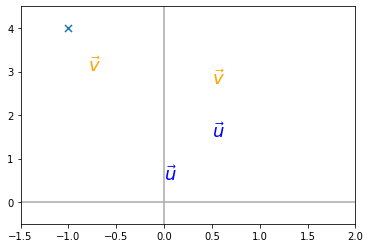

In [0]:
print(vector_b_right_hand[0])
print(type(int(vector_b_right_hand[0])))

matrix_A_coefficient = np.array([[2, -1],
                                 [-1, 2]])
vector_X = np.array([[x_unknown],
                     [y_unknown]])
vector_b_right_hand = np.array([[0],
                                [3]])
print(r'$\vec{u}$')
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color='blue', size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color='blue', size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color='orange', size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color='orange', size=18)

print("\033[1;32;40m Bright Green  \n")
print("\033[9;30;31m Bright Green  \n")

print(vector_b_right_hand[0])

print(max(0, 0.0))
print(min(0, 0.0))

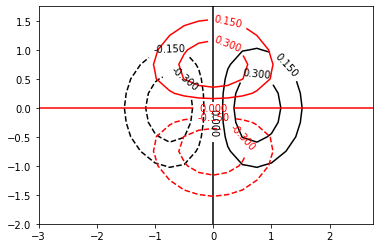

In [0]:
delta = 0.25
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = X*np.exp(-X**2-Y**2)
Z2 = Y*np.exp(-X**2-Y**2)

fig, ax = plt.subplots()

CS1 = ax.contour(X, Y, Z1, colors='k')
ax.clabel(CS1, inline=1, fontsize=10)

CS2 = ax.contour(X, Y, Z2, colors='r')
ax.clabel(CS2, inline=1, fontsize=10)

lines = [ CS1.collections[0], CS1.collections[-1], CS2.collections[0], CS2.collections[-1]]
labels = ['CS1_neg','CS1_pos','CS2_neg','CS2_pos']

# plt.legend(lines, labels)
# plt.show()